<a href="https://colab.research.google.com/github/THANUJAJULURU/skillsanta/blob/main/Detection_Of_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import glob
import PIL

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/sample data/Meander_HandPD.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
data_dir='/content/train1'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
#data_dir = glob.glob(data_dir)
data_dir

PosixPath('/content/train1')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('/content/train1/MeanderPatients/0242-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0161-6.jpg'),
 PosixPath('/content/train1/MeanderPatients/0229-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0230-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0139-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0010-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0031-7.jpg'),
 PosixPath('/content/train1/MeanderPatients/0230-5.jpg'),
 PosixPath('/content/train1/MeanderPatients/0254-6.jpg'),
 PosixPath('/content/train1/MeanderPatients/0023-7.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

368


In [ ]:
MeanderControl = list(data_dir.glob('MeanderControl/*'))
MeanderControl[:5]

[PosixPath('/content/train1/MeanderControl/0287-7.jpg'),
 PosixPath('/content/train1/MeanderControl/0068-6.jpg'),
 PosixPath('/content/train1/MeanderControl/0287-8.jpg'),
 PosixPath('/content/train1/MeanderControl/0112-6.jpg'),
 PosixPath('/content/train1/MeanderControl/0106-6.jpg')]

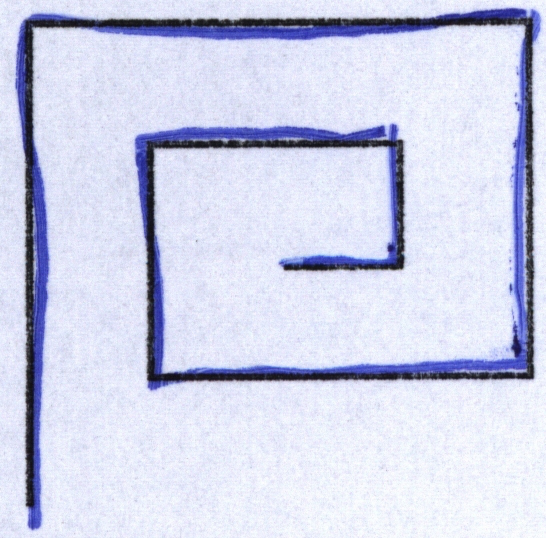

In [ ]:
PIL.Image.open(str(MeanderControl[1]))

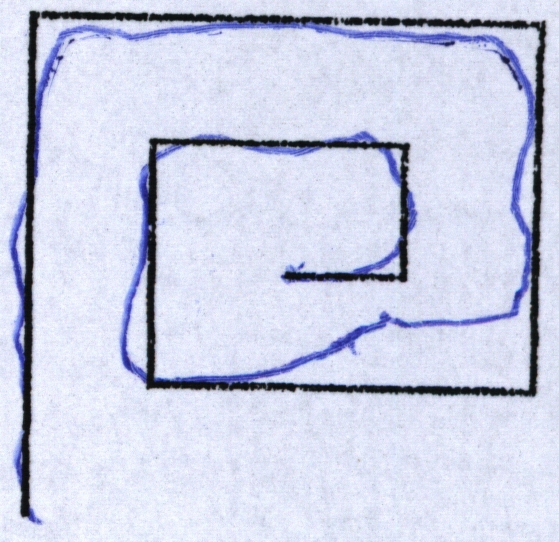

In [ ]:
MeanderPatients = list(data_dir.glob('MeanderPatients/*'))
PIL.Image.open(str(MeanderPatients[0]))

In [ ]:
PD_images_dict = {
    'MeanderControl': list(data_dir.glob('MeanderControl/*')),
    'MeanderPatients': list(data_dir.glob('MeanderPatients/*')),
}

In [ ]:
PD_labels_dict = {
    'MeanderControl': 0,
    'MeanderPatients': 1,
}

In [ ]:
labels={
    0:'MeanderControl',
    1:'MeanderPatients'
}

In [ ]:
PD_images_dict['MeanderControl'][:5]

[PosixPath('/content/train1/MeanderControl/0287-7.jpg'),
 PosixPath('/content/train1/MeanderControl/0068-6.jpg'),
 PosixPath('/content/train1/MeanderControl/0287-8.jpg'),
 PosixPath('/content/train1/MeanderControl/0112-6.jpg'),
 PosixPath('/content/train1/MeanderControl/0106-6.jpg')]

In [ ]:
str(PD_images_dict['MeanderControl'][0])

'/content/train1/MeanderControl/0287-7.jpg'

In [ ]:
img = cv2.imread(str(PD_images_dict['MeanderControl'][0]))

In [ ]:
img.shape

(584, 554, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for PD_name, images in PD_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(PD_labels_dict[PD_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

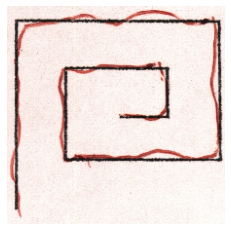

In [ ]:
plt.axis('off')
plt.imshow(X[0])

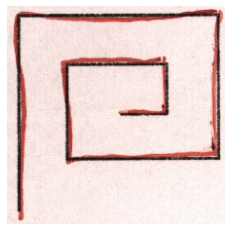

In [ ]:
plt.axis('off')
plt.imshow(X[1])

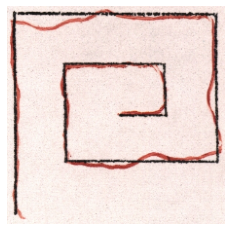

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

# **Take a Pretrained Model and retrain it using PD dataSet**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 11s 751ms/step - loss: 0.4831 - acc: 0.8116
Epoch 2/10
9/9 [==============================] - 7s 782ms/step - loss: 0.3886 - acc: 0.8406
Epoch 3/10
9/9 [==============================] - 7s 815ms/step - loss: 0.3302 - acc: 0.8225
Epoch 4/10
9/9 [==============================] - 7s 788ms/step - loss: 0.2969 - acc: 0.8659
Epoch 5/10
9/9 [==============================] - 7s 786ms/step - loss: 0.2719 - acc: 0.8732
Epoch 6/10
9/9 [==============================] - 7s 766ms/step - loss: 0.2602 - acc: 0.8768
Epoch 7/10
9/9 [==============================] - 7s 747ms/step - loss: 0.2527 - acc: 0.9058
Epoch 8/10
9/9 [==============================] - 7s 741ms/step - loss: 0.2351 - acc: 0.8913
Epoch 9/10
9/9 [==============================] - 7s 791ms/step - loss: 0.2195 - acc: 0.9312
Epoch 10/10
9/9 [==============================] - 7s 773ms/step - loss: 0.2264 - acc: 0.9022


In [ ]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 3s 714ms/step - loss: 0.3149 - acc: 0.8913


[0.3148689568042755, 0.8913043737411499]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

image = []
  # code to open the image
#C:/Users/Dell/OneDrive/Desktop/Notebooks/train/Severe/7a6e384a0846.png
img= PIL.Image.open("/content/train1/MeanderPatients/0002-7.jpg")#C:/Users/Dell/OneDrive/Desktop/Notebooks/train/No_DR/00cc2b75cddd.png")
img = img.resize((224,224))
image.append(img)
img = np.asarray(img, dtype= np.float32)
img = img / 224
img = img.reshape(-1,224,224,3)
predict = model.predict(img)
predict = np.argmax(predict)

# After giving the handwriting of a Person We classified in to Healthy or Parkinson's group

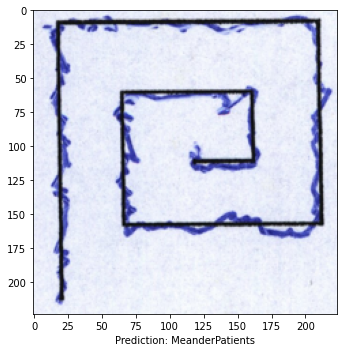

MeanderPatients


In [ ]:
fig=plt.figure(figsize = (5,5))
plt.xlabel("Prediction: " + labels[predict] )
plt.imshow(image[0])
fig.tight_layout()
plt.show()
print(labels[predict])